# Used Car Database Analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [2]:
data = pd.read_csv("UserCarData.csv")

### Understanding Data
##### Reading Columns and Values

In [3]:
data.head(5)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


##### Checking the size and shape of the database

In [4]:
data.tail(5)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N
7905,8128,Tata,2013,290000,25000,East,Maine,Augusta,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [5]:
data.shape

(7906, 18)

##### Checking for null values

In [6]:
data.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

##### Checking datatypes

In [7]:
data.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

##### Database describe

In [8]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,"7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00","7,906.00"
mean,"4,070.11","2,013.98","649,813.72","69,188.66",19.42,"1,458.71",91.59,5.42
std,"2,345.77",3.86,"813,582.75","56,792.30",4.04,503.89,35.75,0.96
min,1.00,"1,994.00","29,999.00",1.00,0.00,624.00,32.80,2.00
25%,"2,037.25","2,012.00","270,000.00","35,000.00",16.78,"1,197.00",68.05,5.00
50%,"4,076.50","2,015.00","450,000.00","60,000.00",19.30,"1,248.00",82.00,5.00
75%,"6,102.00","2,017.00","690,000.00","95,425.00",22.32,"1,582.00",102.00,5.00
max,"8,128.00","2,020.00","10,000,000.00","2,360,457.00",42.00,"3,604.00",400.00,14.00


### Data Cleaning

In [9]:
# Discarding useless and uninteresting columns
data =  data.drop(["Sales_ID", "Region", "torque"],axis = 1)
data.head(5)

,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,Maruti,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,Y
1,Skoda,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,Y
2,Honda,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5,Y
3,Hyundai,2010,225000,127000,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5,Y
4,Maruti,2007,130000,120000,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5,Y


### Graphical Representation

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

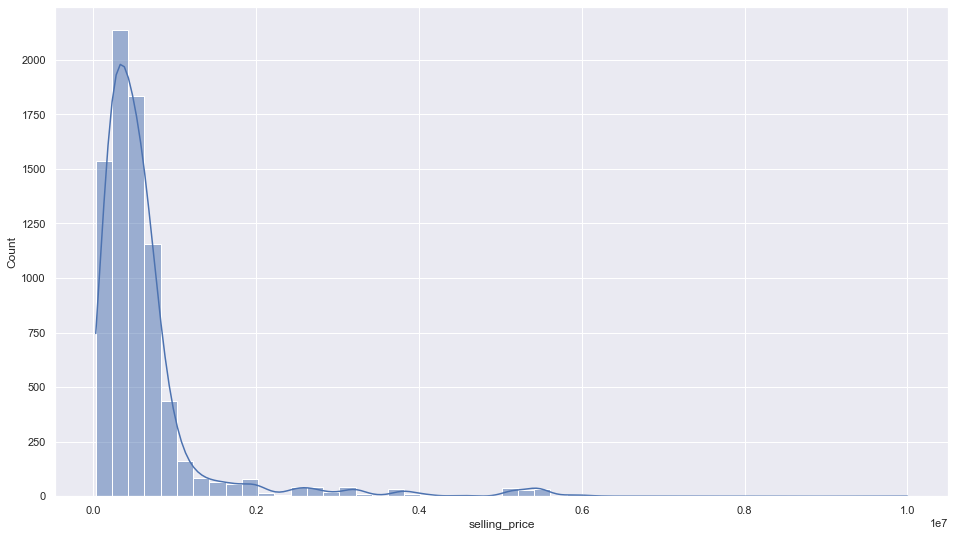

In [28]:
sns.set(rc={"figure.figsize":(16, 9)})
sns.histplot(data['selling_price'], bins = 50, kde=True)

<AxesSubplot:title={'center':'State or Province'}>

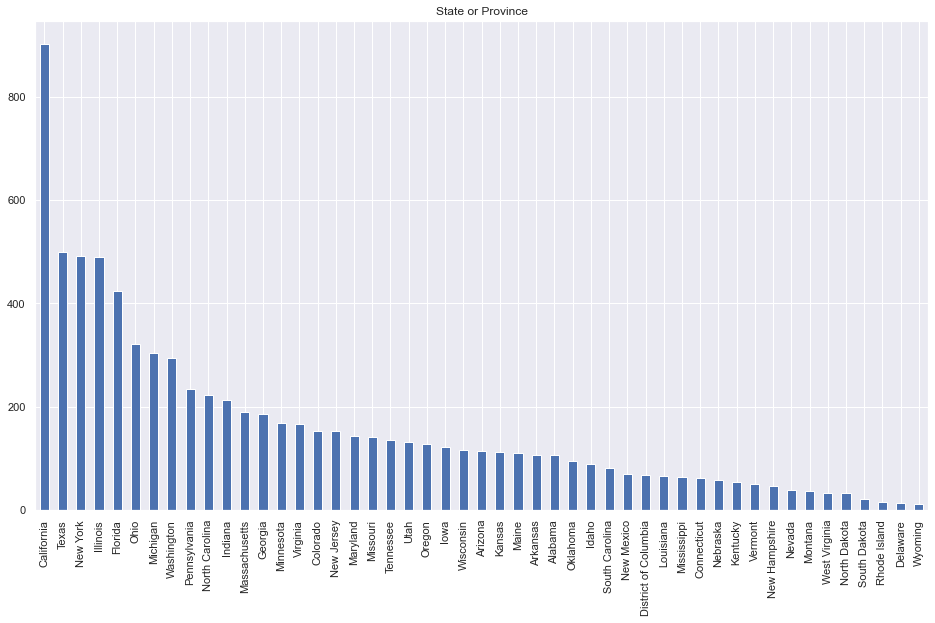

In [11]:
data['State or Province'].value_counts().plot(kind='bar', title='State or Province', figsize=(16,9))

<AxesSubplot:title={'center':'Fuel Type'}>

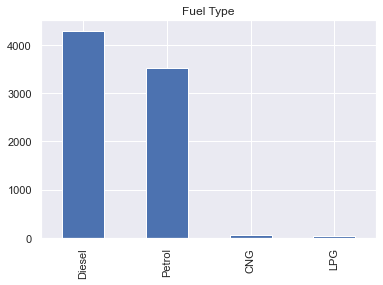

In [12]:
data['fuel'].value_counts().plot(kind='bar', title='Fuel Type')

<AxesSubplot:title={'center':'Seller Type'}>

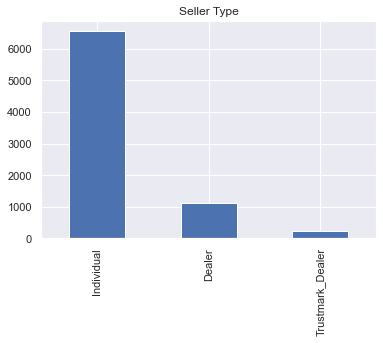

In [13]:
data['seller_type'].value_counts().plot(kind='bar', title='Seller Type')

<AxesSubplot:title={'center':'Transmission'}>

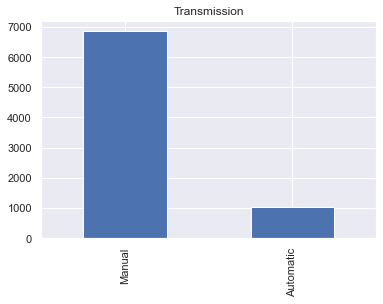

In [14]:
data['transmission'].value_counts().plot(kind='bar', title='Transmission')

<AxesSubplot:title={'center':'Owner Type'}>

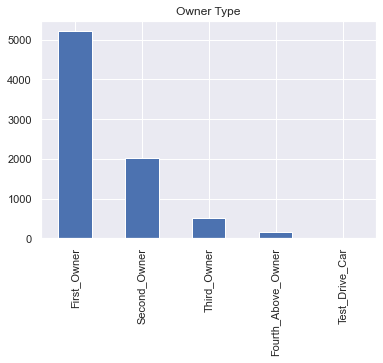

In [15]:
data['owner'].value_counts().plot(kind='bar', title='Owner Type')

##### Finding Correlations

<AxesSubplot:>

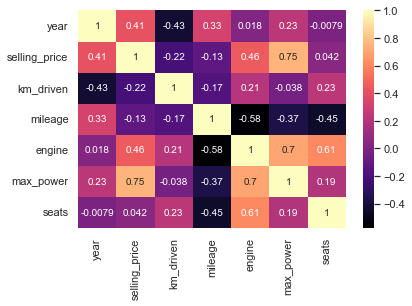

In [16]:
sns.heatmap(data = data.corr(), annot = True, cmap = "magma")

### Answering Questions
1. What is the most expensive car make in this database?
2. I want to sell my car urgently. It is Hyuindai 1396cm3, Diesel, Manual, driven 60000 km. For what amount of money to put the car up for sale?
3. Does the automatic transmission have a positive or negative effect on the selling price?
4. what is the average time of ownership of one car before sale

##### 1. What is the most expensive car make according to database?

In [17]:
grouped = data.groupby("name")["selling_price"].mean()
grouped.sort_values(ascending = False)

name
Lexus        5,150,000.00
BMW          4,153,813.56
Land         3,608,333.33
Volvo        3,272,014.93
Jaguar       2,915,464.79
Audi         2,612,199.92
Mercedes     2,470,444.44
Jeep         2,149,612.87
Isuzu        1,942,000.00
MG           1,783,333.33
Kia          1,504,500.00
Toyota       1,011,920.31
Force          887,500.00
Mitsubishi     817,500.00
Mahindra       630,021.07
Skoda          609,721.12
Honda          596,920.89
Ford           520,873.67
Volkswagen     489,891.88
Hyundai        473,280.47
Nissan         465,407.36
Renault        462,618.38
Maruti         409,011.14
Tata           361,853.83
Fiat           317,195.07
Datsun         314,599.95
Ashok          300,000.00
Chevrolet      273,867.48
Ambassador     124,000.00
Daewoo          77,000.00
Opel            68,000.00
Name: selling_price, dtype: float64

Awswer is Lexus

##### 2. I want to sell my car urgently. It is Hyuindai 1396cm3, Diesel, driven 60000 kilometers. For what amount of money to put the car up for sale?

To sell a car urgently I assume you need to list it at 25th percentile of the price of similar cars

In [29]:
#Creating temp dataframe with desired conditions
temp = data.loc[(data["name"] == "Hyundai") & (data["engine"] == 1396) & (data["fuel"] == "Diesel") &
                (data["km_driven"] >= 50000) & (data["km_driven"] <= 70000)]
print("Answer is: ", temp['selling_price'].quantile(q=0.25))


Answer is:  442500.0


##### 3. Does the automatic transmission have a positive or negative effect on the selling price?

###### Data Preparation:

In [19]:
# Creation of a more useful 'age' column instead of 'year', but leaving 'year' column in place
data["age"] = (2021 - data["year"])

##### Droping the outliners

<AxesSubplot:xlabel='selling_price'>

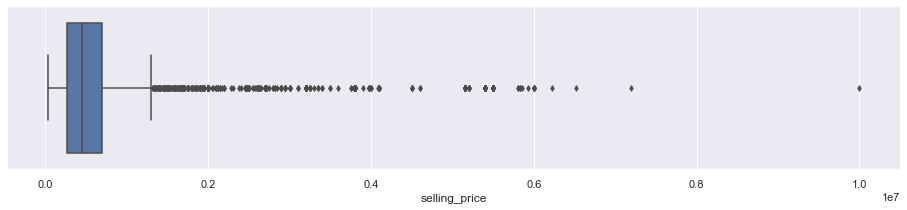

In [20]:
sns.set(rc={"figure.figsize":(16, 3)})
sns.boxplot(x=data['selling_price'], fliersize = 4)

In [21]:
# creation of a temp database, where I will remove the outliners
temp = data.loc[data["selling_price"] <= 3000000]

<AxesSubplot:xlabel='km_driven'>

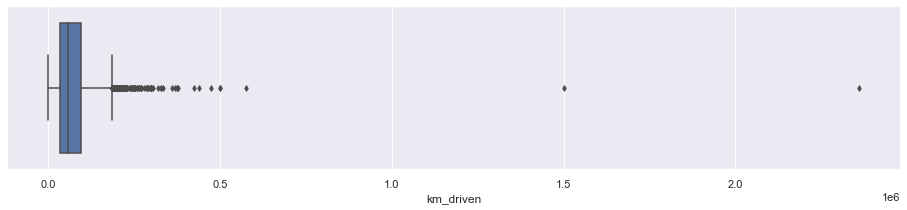

In [22]:
sns.boxplot(x=data['km_driven'], fliersize = 4)

In [23]:
temp = temp.loc[temp["km_driven"] <= 300000]

<AxesSubplot:xlabel='max_power'>

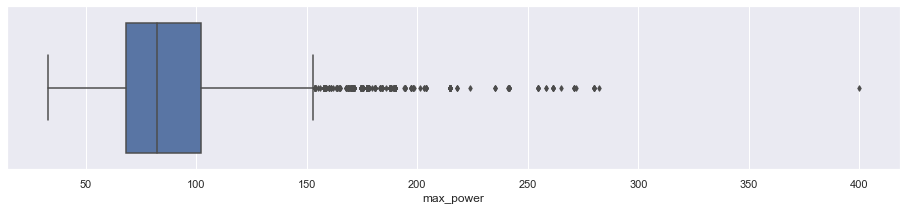

In [24]:
sns.boxplot(x=data['max_power'],  fliersize = 4)

In [25]:
temp = temp.loc[temp["max_power"] <= 200]

##### Data Visualisation

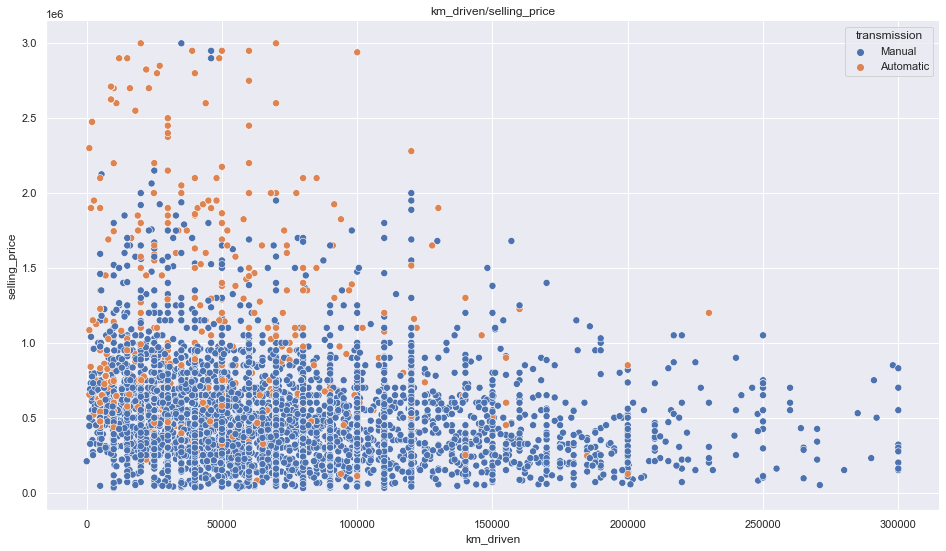

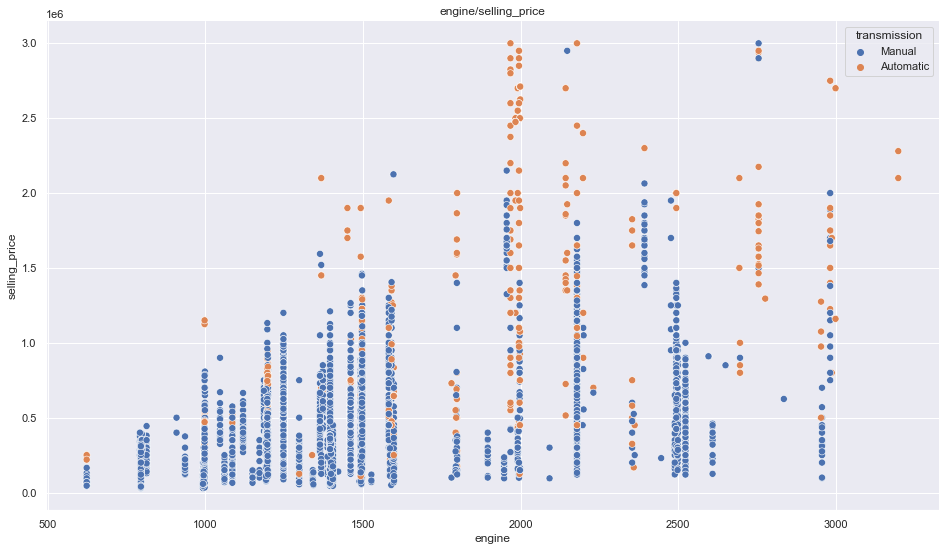

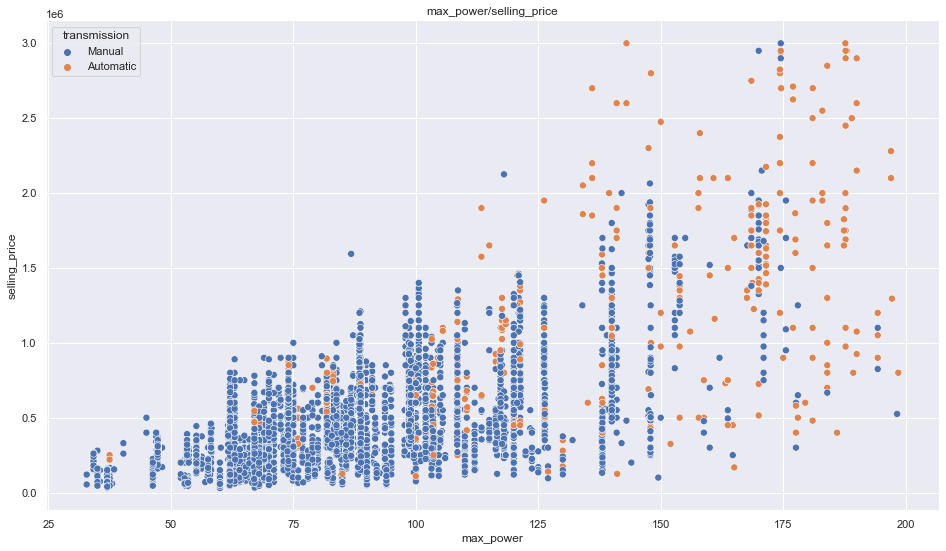

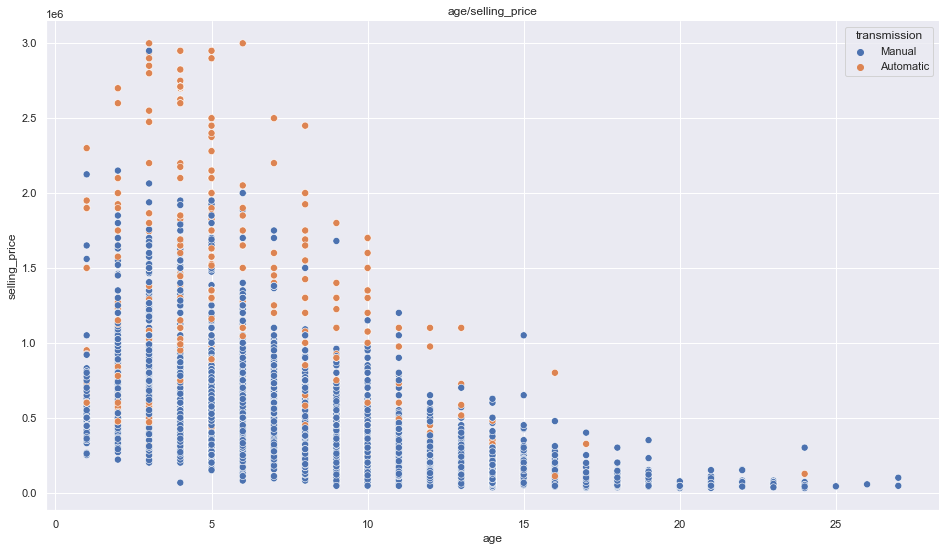

In [26]:
def scatter(x, y):
    plot3 = sns.scatterplot(x=x, y=y, data = temp, s=50, hue="transmission")
    plot3.set_title(f"{x}/{y}")
    plot3.set_xlabel(f"{x}")
    plot3.set_ylabel(f"{y}")

    plot3.spines['top'].set_visible(False)
    plot3.spines['right'].set_visible(False)
    plt.show()

categories = ["km_driven", "engine", "max_power", "age"]
sns.set(rc={"figure.figsize":(16, 9)})
for x in categories:
    scatter(x, "selling_price")

As you can easily see, cars with automatic transmissions reach higher prices 

##### 4. what is the average time of ownership of one car before sale?

I will only consider sold cars, as unsold cars are not known to change owner. I will also not consider the value "Four and above owner" and "Test Car" because we do not know the exact amount of owners before sale. Then I will divide the total age of the car by the total number of owners

In [27]:
# Data Preparation
temp = data.copy()

# Changing strings to integers, and setting nan for unused values
temp.loc[temp['owner'] == "First_Owner", 'owner'] = 1
temp.loc[temp['owner'] == "Second_Owner", 'owner'] = 2
temp.loc[temp['owner'] == "Third_Owner", 'owner'] = 3
temp.loc[temp['owner'] == "Fourth_Above_Owner", 'owner'] = np.nan
temp.loc[temp['owner'] == "Test_Drive_Car", 'owner'] = np.nan
temp["owner"] = temp["owner"].astype(float).astype('Int64')

# Data selection
temp = temp.loc[(temp["sold"] == "Y") & (temp["owner"] >= 1) & (temp["owner"] <= 3)]

# Mathematical operation
temp['age'].to_numpy().sum() / temp['owner'].to_numpy().sum()

4.9291774253043155

Answer is about 5 years